# Attendance

[The link to SEAts](https://gold.seats.cloud/angular/#/lectures)

#### Announcements

- Added these notebooks as Colab links on the VLE (ready to be read)
- I often update these materials: download the zip again at the time of the lecture for the latest version!

# 2. The mathematical building blocks of neural networks

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# we need more than the default 75 below
np.set_printoptions(linewidth=150)

# matplotlib shenanigans
import matplotlib
plt_fontsize = matplotlib.rcParams["font.size"]

---

# 2.1 A first look at a neural network

## Workflow
1. **Load data**
2. Preprocess data
3. Build network
4. Train
5. Test

### 1 Load data

## MNIST

[MNIST](https://en.wikipedia.org/wiki/MNIST_database) is a set of images of handwritten digits.

The problem is to classify each greyscale image into the correct category, namely '0', '1'..., '9'.

 Truly the **Hello World** of Deep Learning!

There are 60,000 **training** images and 10,000 **test** images.

The MNIST dataset is one of several TensorFlow datasets.

Loading MNIST is painless because it ships with TensorFlow.

But this ease is unusual: normally data has to be retrieved from the internet or from a private source.

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [3]:
def mnist_peek(rows, cols):
    fig, axs = plt.subplots(rows, cols)
    for i in range(rows):
        for j in range(cols):
            axs[i, j].imshow(train_images[i * cols + j], cmap=plt.cm.binary)

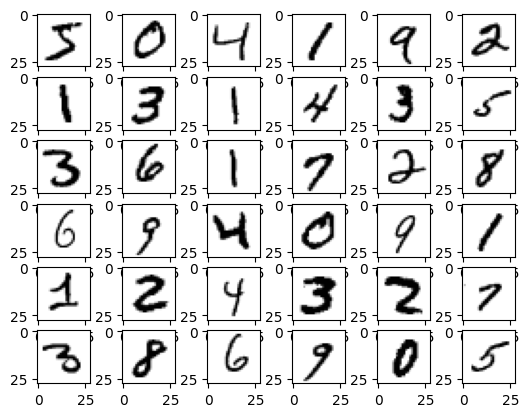

In [4]:
mnist_peek(6, 6)

## Samples, labels and classes


|               |     |        |
|--------------:|:---:|:-------|
|data point     | \|  | sample |
|category       | \|  | class  |
|class of sample| \|  | label  |

 - Each image, or in general, each data point is known as a **sample**.
 - Data points typically belong to one or more categories, called a **class**.
 - Each MNIST image belongs to exactly one category or **class** - '0', '1', '2' etc.
 - The class of a sample is known as its **label**.

## Training and Test Set


```python
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
```

- `train_images` and `train_labels` form the **training set**.
- The model will **learn** from the training set.
- The model will be **tested** on `test_images` and `test_labels`, the test set.

We split our data to try and estimate **how well our network will perform on unseen data**!

## Images and NumPy arrays


The data is stored in special multidimensional arrays – tensors.

Each image is 28 x 28 pixels:

- the training set is a data container with 60000 x 28 x 28 elements;
- the training labels are stored in a 60,000 element vector.

In [5]:
print("tensor:\t\t shape")
print("-"*22)
print("training images:", train_images.shape)
print("training labels:", train_labels.shape)
print("test images:\t", test_images.shape)
print("test labels:\t", test_labels.shape)

tensor:		 shape
----------------------
training images: (60000, 28, 28)
training labels: (60000,)
test images:	 (10000, 28, 28)
test labels:	 (10000,)


## Workflow
1. Load data
2. **Preprocess data**
3. Build network
4. Train
5. Test

### 2. Preprocess data

The data has to be **reshaped** to a form that is acceptable to the network.

The network will expect samples as **vectors (1D arrays)** of floating point values.


<!-- ![deep-in-deep-learning.002.png](images/deep-in-deep-learning.002.png) -->
<img style="" src="https://raw.githubusercontent.com/jchwenger/AI/main/2-building-blocks/images/deep-in-deep-learning.002.png">

In [6]:
print(test_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 198 19

label:  7


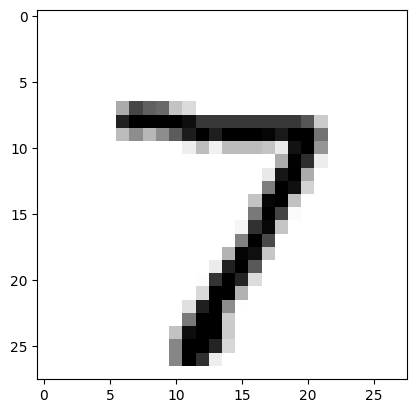

In [7]:
# inspect the first image using the matplotlib graphics library
print('label: ', test_labels[0])
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.show()

In [8]:
# unprocessed data, kept for later
raw_test_images, raw_test_labels = test_images, test_labels

train_images = train_images.reshape((60000, 28 * 28)) # reshape flattens 28 x 28 arrays
test_images = test_images.reshape((10000, 28 * 28))   # to vectors of 784 elements

train_images = train_images.astype('float32') / 255   # cast as floats
test_images = test_images.astype('float32') / 255     # and rescale to [0, 1]

The network is also expecting **categorically encoded labels**.

That means a vector with a **single nonzero element** at the **index** corresponding to the category.

Here, each label will be turned into a 10 element vector with a single (**hot**) nonzero entry.

For example, '7' is encoded as `[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]`.

This is called **one-hot encoding**.

In [9]:
orig_label   = test_labels[0]
train_labels = tf.keras.utils.to_categorical(train_labels) # encode with the nifty `to_categorical` function
test_labels  = tf.keras.utils.to_categorical(test_labels)

# check encoding
print(f"'{orig_label}' as a one-hot vector: {test_labels[0]}")

'7' as a one-hot vector: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Workflow
1. Load data
2. Preprocess data
3. **Build network**
4. Train
5. Test

### 3. Build our network

We create a simple neural network.

It will contain two layers layers (aka **data-processing modules (transformations)**).

Data will move in a single `forward` direction through the network – a `feed-forward` neural network.

<!-- <img style="float:right;height:400px" src="images/tikz12.png" style="float:right">  -->
<img style="float:right;height:400px" src="https://raw.githubusercontent.com/jchwenger/AI/main/2-building-blocks/images/tikz12.png">

<small style="position:absolute; bottom:0; right:0"><a href="http://neuralnetworksanddeeplearning.com/chap1.html">Michael Nielsen, <em>Neural Networks and Deep Learning</em>, Determination Press, 2015</a>, <a href="https://creativecommons.org/licenses/by-nc/3.0/deed.en_GB">License</a></small>


In [10]:
# an empty network
network = tf.keras.models.Sequential()

# add two layers
network.add(tf.keras.layers.Input((28 * 28, )))
network.add(tf.keras.layers.Dense(512, activation='relu'))
network.add(tf.keras.layers.Dense(10, activation='softmax'))

 - `tf.keras.models.Sequential()` creates the empty net.

 - `network.add()` adds a layer:
   - `layers.Dense` objects. `Dense` means **fully-connected**.  
     Parameters:
     - the number of neurons;  
     - the activation function;
     - the input shape of the data (only for the first layer).
    

```python
network.add(tf.keras.layers.Input((28 * 28, )))
network.add(tf.keras.layers.Dense(512, activation='relu'))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
```
- The activation function in the 1<sup>st</sup> layer is the **Rectified Linear (RELU)**  (aka positive part):

$$ relu(x) = \max(0, x)$$

 - The 2<sup>nd</sup> layer is capped with a **softmax**, which outputs a **probability distribution**:
    - numbers are **nonnegative** and **sum to one**;
    - they are the **probabilities of membership of each class**:  
      the probability that the sample is labeled '0' or '1', etc.

### Visualising the ReLU

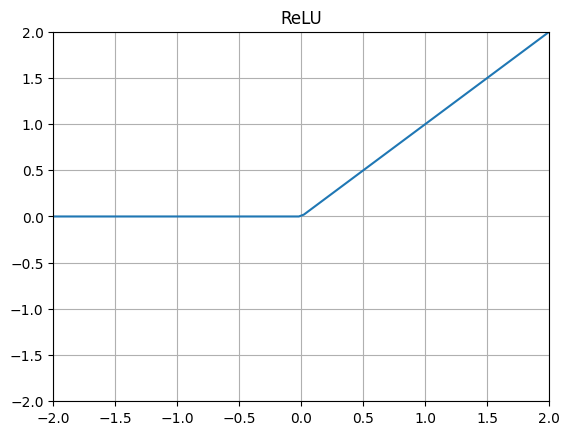

In [11]:
data = np.linspace(-2, 2, 100) # one hundred numbers
plt.plot(data, tf.nn.relu(data))
plt.title("ReLU")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.grid()
plt.show()

### Visualising the softmax

The probabilities sum to: 0.9999998807907104! (o˘◡˘o)


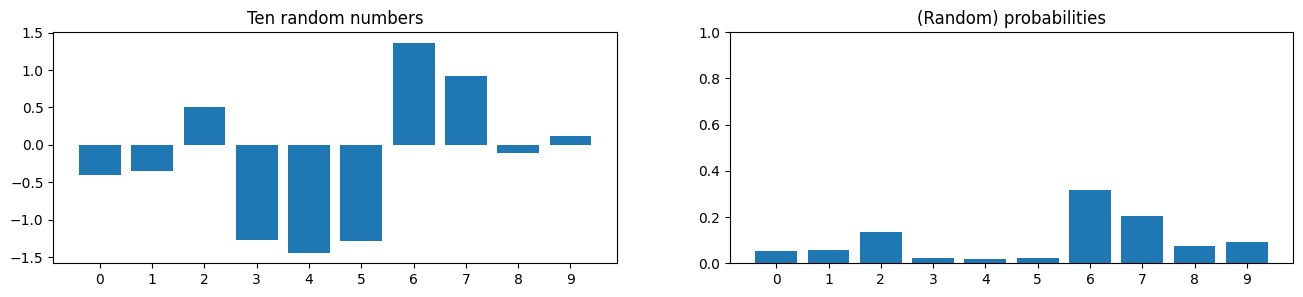

In [12]:
nums = tf.random.normal(shape=(10,))                    # ten random numbers
probs = tf.nn.softmax(nums)                             # turned into probabilities

print(f"The probabilities sum to: {tf.reduce_sum(probs).numpy()}! (o˘◡˘o)")

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(16,3))
ax1.bar([str(x) for x in range(nums.shape[0])], nums)   # our ten numbers
ax1.set_title("Ten random numbers")
ax2.bar([str(x) for x in range(probs.shape[0])], probs) # plot the probabilities
ax2.set_title("(Random) probabilities")
ax2.set_ylim([0,1])
plt.show()

The network is not yet ready.

We must specify:

- a **loss** function;

- an **optimiser**;

- one or more training **metrics**.

The optimiser makes **parameter adjustments** in the training loop, and **reports progress** on our metrics.

In [13]:
# loss, optimiser and metrics are chosen at compilation
network.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

`categorical_crossentropy` is the preferred loss for **single label multiclass problems**.

`rmsprop` is one of several `tensorflow.keras` **optimizers**.  
The update depends on input data (a *mini-batch*, a subset of our dataset) and the loss function.

We monitor `accuracy`, the fraction of correctly classified samples: `correct_predictions/total`.

### Cross-entropy

The loss function `categorical_crossentropy` quantifies **how far off** the network prediction is from the target.

We are actually looking at **how different** two probability distributions are.

The **label vector** has all the probability mass on one value (the correct label).

### Softmax vs one-hot ground truth

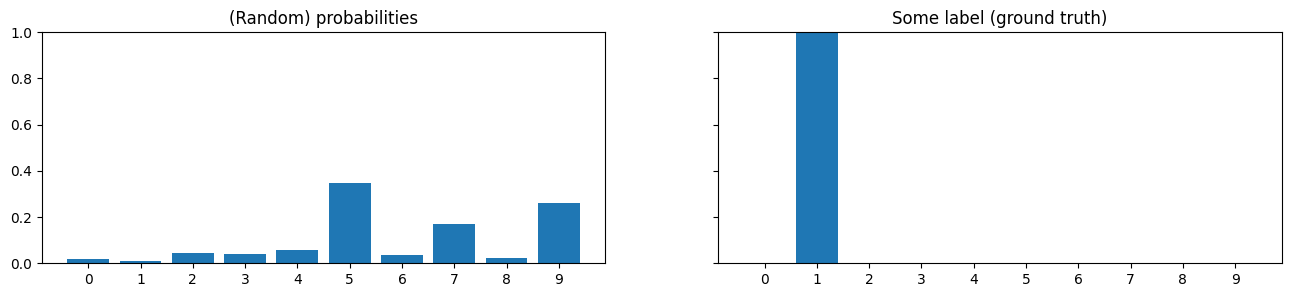

In [14]:
nums = tf.random.normal(shape=(10,))                                    # ten random numbers
probs = tf.nn.softmax(nums)                                             # turned into probabilities

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(16,3))
ax1.bar([str(x) for x in range(probs.shape[0])], probs)                 # plot the probabilities
ax1.set_title("(Random) probabilities")
ax1.set_ylim([0,1])
ax2.bar([str(x) for x in range(probs.shape[0])], [0,1,0,0,0,0,0,0,0,0]) # plot an imaginary label
ax2.set_title("Some label (ground truth)")
ax2.set_ylim([0,1])
plt.show()

### Cross entropy

<!-- <img style="height:250px" src="images/cross-entropy.png"> -->
<img style="height:250px" src="https://raw.githubusercontent.com/jchwenger/AI/main/2-building-blocks/images/cross-entropy.png">

<small>[What is cross-entropy, Stack Overflow](https://stackoverflow.com/a/41990932)</small>

### Cross entropy

What does this mean for us? For **all** categories except the right one, the terms of this sum will be zero.

Since `true_class` is 1, we are left only with:

$$
\bbox[5px,border:2px solid red]
{
- p(\text{true class})\ log{(\text{prediction})} \to - log{(\text{prediction})}
}
$$

Sure, but what does **that** mean for us?

In [16]:
def plot_minus_log(figsize=(10,8)):
    points = tf.linspace(.001, 1, 100) # a hundred points between .001 and 1
    matplotlib.rcParams.update({'font.size': plt_fontsize * 1.5})
    f = plt.figure(figsize=figsize)
    plt.xlim([-.1,1.1])
    plt.plot(points, - tf.math.log(points), label="- log(x)")
    plt.text(0.05, 6, "← we are very WRONG: prediction")
    plt.text(0.05, 5.5, "is almost 0 but the truth is 1...")
    plt.text(0.05, 5, "BIG loss!")
    plt.text(.52, 1.5, "we are super RIGHT: prediction")
    plt.text(.52, 1, "is almost 1 and the truth is 1...")
    plt.text(.8, .5, "SMALL loss ↓")
    plt.xlabel("Prediction: from 0 to 1")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    matplotlib.rcParams.update({'font.size': plt_fontsize})

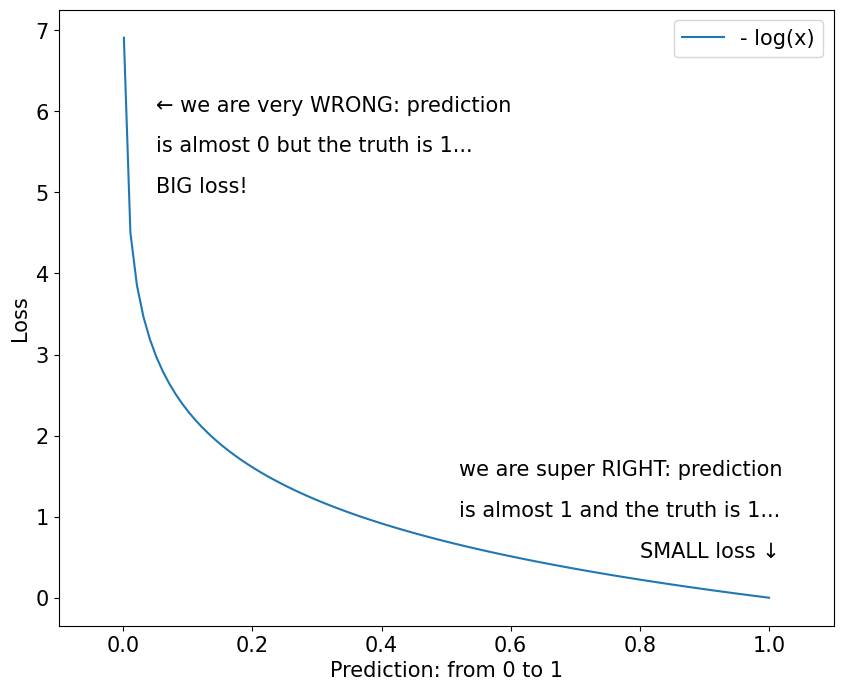

In [17]:
plot_minus_log()

## Workflow
1. Load data
2. Preprocess data
3. Build network
4. **Train**
5. Test

### Before we train: what's our starting point?

- Let's see what our model can do without any training.

- We `evaluate` it on the test set, as we will do later.

In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print()
print('test_acc:', test_acc)
print('1 would have been perfect...ground breaking! o(〒﹏〒)o')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0904 - loss: 2.3729

test_acc: 0.08209999650716782
1 would have been perfect...ground breaking! o(〒﹏〒)o


### 4. Train

- All set to train!The model is *fitted* to its training data (= **training**): `Model.fit()`.

- Two quantities will be displayed during training:
    - the **loss** of the network over the training data;
    - the **accuracy** of the network over the training data.

- An **epoch** is a complete pass over the training set.

- Each pass is split into **mini-batches** (number of sample processed in one go, we will see why).

The optimiser – `rmsprop`– tweaks layer parameters (weights and biases).

The parameters are adjusted in an attempt to **lower the loss** – the discrepancy between prediction and target.

<!-- <img src="images/understanding/chollet.three-figures.3.png" style="height: 400px; float:right"> -->
<img style="height: 400px; float:right" src="https://raw.githubusercontent.com/jchwenger/AI/main/2-building-blocks/images/understanding/chollet.three-figures.3.png">

<small style="position:absolute;bottom:0;right:0;">DLWP, p.10</small>

`Model.fit()` has several arguments:

 - the training samples;
 - the labels;
 - `epochs` and `batch_size` settings.


Watch for the monitoring information printed at the end of each epoch:
- the loss is (should be) decreasing;
- the accuracy is (should be) increasing;

In [19]:
# training - fit to input data
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8735 - loss: 0.4392
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9646 - loss: 0.1198
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9791 - loss: 0.0709
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9854 - loss: 0.0510
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0369


After training, we see that the network correctly recognises almost 99% of the images.

But, for reasons that we will discuss at length later on, this does not mean that the network performs with 99% accuracy on **unseen data**.

That is why we need to test it (again).

## Workflow
1. Load data
2. Build network
3. Preprocess data
4. Train
5. **Test**

### 5. Test the network on unseen data.

`Model.evaluate()` runs the test image data, sample by sample, through the network in a forward pass, and prints the overall loss and accuracy.

In [20]:
# evaluate on the test set
test_loss, test_acc = network.evaluate(test_images, test_labels)

print()
print('test_acc:', test_acc)
print('Yay! ٩(◕‿◕｡)۶')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0842

test_acc: 0.977400004863739
Yay! ٩(◕‿◕｡)۶


## Evaluation

- Test set accuracy is lower than the training set accuracy.

- This is to be expected!

- This gap between *training accuracy* and *test accuracy* will become very important when we talk about **overfitting**.

- Machine learning models, like humans?, tend to perform **worse on new data** than on their training data.

- Intuitively, what happens is that the network *overadapts* to the training data, creating a representation that is really inapplicable to new data.

In [21]:
# the program so far: less than 20 lines of code!
                                                                                           # 1. LOAD
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))                                      # 2. PREPROCESS
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

network = tf.keras.models.Sequential()                                                     # 3. BUILD
network.add(tf.keras.layers.Input((28 * 28, )))
network.add(tf.keras.layers.Dense(512, activation='relu'))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=5, batch_size=128)                          # 4. TRAIN

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8775 - loss: 0.4375
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9670 - loss: 0.1138
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9781 - loss: 0.0738
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0510
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0375


### Use our network

We can see the softmax output for a single sample by calling `Model.predict()`.

In [22]:
preds = network.predict(test_images[:1], verbose=0) # note the syntax: test_images[:1] keeps the batch dimension!
argm = np.argmax(preds[0])
for i, x in enumerate(preds[0]):
    if i == argm:
        print(f"\033[1mclass: {i:2} with probability: {x:.15f}\033[0m")
    else:
        print(f"class: {i:2} with probability: {x:.15f}")

class:  0 with probability: 0.000000048186571
class:  1 with probability: 0.000000028336014
class:  2 with probability: 0.000003983504484
class:  3 with probability: 0.000090023037046
class:  4 with probability: 0.000000000139064
class:  5 with probability: 0.000000018279655
class:  6 with probability: 0.000000000002280
class:  7 with probability: 0.999899864196777
class:  8 with probability: 0.000000420580790
class:  9 with probability: 0.000005555181360


##### Note

- `Model.evaluate()` will run evaluation loss and metrics as defined in the `compile` step;
- `Model.predict()` will simply run the network on one or several samples and return predictions.

### Visualising a prediction

If we plot this, the probabilities assigned to the other classes are so small they don't even appear!

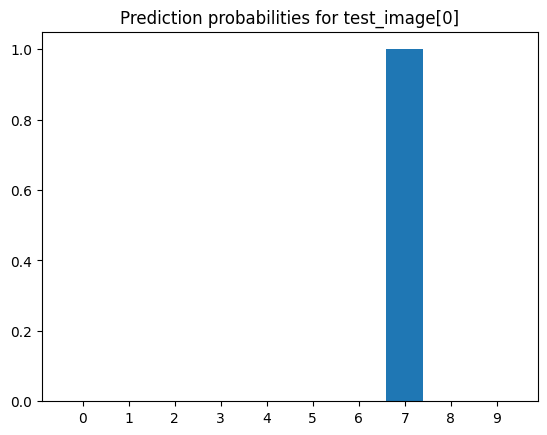

In [23]:
fig, ax = plt.subplots()
ax.bar([str(x) for x in range(10)], preds[0]) # preds.shape: (1, 10)
plt.title("Prediction probabilities for test_image[0]")
plt.show()

We can extract the *index* of the highest probability (= our class) using `np.argmax`.

In [24]:
# what is the most probable class?
# the index of the largest element of the output vector
print(np.argmax(preds[0]))

7


In [25]:
print(f"compare: {test_images[:1].shape} and {test_images[0].shape}")

compare: (1, 784) and (784,)


In [26]:
# does the prediction agree with the label?
print(raw_test_labels[0])

7


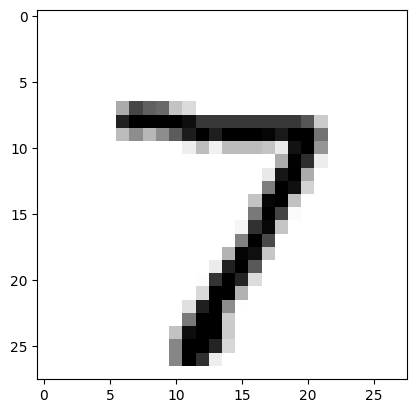

In [27]:
plt.imshow(raw_test_images[0], cmap=plt.cm.binary) # it's a seven!
plt.show()

Our model got that one right!

Remember that the network does not have eyes and a visual cortex.

The network only mapped a 784 element vector to a ten component probability vector.

We supply the meaning.

## So far

We have built, trained and tested our first neural network.

Although the code is unfamiliar, the program is not long.

Most of the work has of course been accomplished by TensorFlow's powerful libraries.

## The Training Loop

0. **Initialize** the weight and bias tensors with small random values.

1. Draw a **mini-batch** of training samples `x` and corresponding labels `y`.

2. **Forward pass**/**Inference**: the network makes a prediction `y_pred`.

3. **Loss**: Calculate how much `y_pred` differs from `y`.

4. **Backward pass**: using the gradient of the parameters with respect to the loss, update all parameters to lower the loss on this mini-batch.

5. Exit or return to 1.

Our goal is to use this tool to build and train neural networks for a variety of different tasks, and how to address the discrepancy between prediction on training and unseen data.

But before we do these things, we have to digress into tensor maths and learn how the optimiser does its job so wonderfully.

#### Note

We are diving into the belly of the beast. This *by far* the mathiest lecture of the term!

And, as much as all this becomes increasingly important as you get deeper into this field, you will find most of what we see today fairly disconnected from our labs for instance!